In [54]:
import time 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import datetime
import csv
import pandas as pd
import numpy as np


In [55]:
url = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_week.csv'

quake_list = pd.read_csv(url)

quake_list['time'] = pd.to_datetime(quake_list['time']).dt.round('S')
quake_list

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-09 06:28:01+00:00,-2.6349,140.5570,21.974,5.1,mww,84.0,35.0,8.303,0.65,...,2023-02-09T06:56:06.332Z,"near the north coast of Papua, Indonesia",earthquake,8.56,5.346,0.098,10.0,reviewed,us,us
1,2023-02-08 20:12:06+00:00,38.2099,38.1438,10.000,4.5,mb,29.0,103.0,1.274,1.18,...,2023-02-09T06:18:17.917Z,"13 km SW of Yeşilyurt, Turkey",earthquake,4.86,1.928,0.270,4.0,reviewed,us,us
2,2023-02-08 17:57:23+00:00,39.7838,40.7847,10.000,4.5,mb,34.0,48.0,1.567,1.20,...,2023-02-08T21:29:44.040Z,"17 km SSE of Aşkale, Turkey",earthquake,3.41,1.911,0.135,16.0,reviewed,us,us
3,2023-02-08 17:48:10+00:00,-2.5967,140.7056,26.026,4.5,mb,35.0,112.0,8.453,1.21,...,2023-02-08T21:24:24.040Z,"7 km SSW of Jayapura, Indonesia",earthquake,11.12,5.839,0.097,31.0,reviewed,us,us
4,2023-02-08 17:07:44+00:00,-22.0064,-179.3457,574.213,4.8,mb,46.0,96.0,4.895,1.24,...,2023-02-08T21:27:07.040Z,south of the Fiji Islands,earthquake,14.69,10.840,0.086,42.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2023-02-02 13:13:23+00:00,16.7273,-60.9352,23.716,5.0,mb,78.0,34.0,0.431,0.81,...,2023-02-02T13:55:21.567Z,"49 km NNE of Beauséjour, Guadeloupe",earthquake,5.62,4.843,0.027,429.0,reviewed,us,us
180,2023-02-02 13:02:45+00:00,-37.6855,175.7229,10.000,4.9,mb,34.0,46.0,0.181,0.87,...,2023-02-08T03:42:49.007Z,"14 km NNW of Matamata, New Zealand",earthquake,5.19,1.744,0.162,12.0,reviewed,us,us
181,2023-02-02 12:19:11+00:00,-5.6935,103.8633,62.677,4.7,mb,54.0,91.0,1.603,0.68,...,2023-02-02T12:44:12.040Z,"148 km SW of Kotabumi, Indonesia",earthquake,7.47,8.268,0.080,48.0,reviewed,us,us
182,2023-02-02 11:09:35+00:00,-32.4463,-71.5247,10.000,4.5,mwr,26.0,177.0,0.584,0.53,...,2023-02-06T10:00:07.040Z,"Near the coast of Valparaiso, Chile",earthquake,3.67,1.984,0.043,53.0,reviewed,us,us


In [56]:
#write a function that takes in a dataframe and returns a dataframe with the distance from the quake to the epicenter

lat1 = float(37.1736)
lon1 = float(37.0320)

def distance(lat1, lon1, lat2, lon2):
    R = 6373.0

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c

    return distance

quake_list['distance'] = quake_list.apply(lambda x: distance(lat1, lon1, x.latitude, x.longitude), axis=1)

In [57]:
quake_list

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,distance
0,2023-02-09 06:28:01+00:00,-2.6349,140.5570,21.974,5.1,mww,84.0,35.0,8.303,0.65,...,"near the north coast of Papua, Indonesia",earthquake,8.56,5.346,0.098,10.0,reviewed,us,us,11384.678495
1,2023-02-08 20:12:06+00:00,38.2099,38.1438,10.000,4.5,mb,29.0,103.0,1.274,1.18,...,"13 km SW of Yeşilyurt, Turkey",earthquake,4.86,1.928,0.270,4.0,reviewed,us,us,151.201522
2,2023-02-08 17:57:23+00:00,39.7838,40.7847,10.000,4.5,mb,34.0,48.0,1.567,1.20,...,"17 km SSE of Aşkale, Turkey",earthquake,3.41,1.911,0.135,16.0,reviewed,us,us,437.036608
3,2023-02-08 17:48:10+00:00,-2.5967,140.7056,26.026,4.5,mb,35.0,112.0,8.453,1.21,...,"7 km SSW of Jayapura, Indonesia",earthquake,11.12,5.839,0.097,31.0,reviewed,us,us,11395.182838
4,2023-02-08 17:07:44+00:00,-22.0064,-179.3457,574.213,4.8,mb,46.0,96.0,4.895,1.24,...,south of the Fiji Islands,earthquake,14.69,10.840,0.086,42.0,reviewed,us,us,16151.154812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2023-02-02 13:13:23+00:00,16.7273,-60.9352,23.716,5.0,mb,78.0,34.0,0.431,0.81,...,"49 km NNE of Beauséjour, Guadeloupe",earthquake,5.62,4.843,0.027,429.0,reviewed,us,us,9576.098886
180,2023-02-02 13:02:45+00:00,-37.6855,175.7229,10.000,4.9,mb,34.0,46.0,0.181,0.87,...,"14 km NNW of Matamata, New Zealand",earthquake,5.19,1.744,0.162,12.0,reviewed,us,us,16402.315751
181,2023-02-02 12:19:11+00:00,-5.6935,103.8633,62.677,4.7,mb,54.0,91.0,1.603,0.68,...,"148 km SW of Kotabumi, Indonesia",earthquake,7.47,8.268,0.080,48.0,reviewed,us,us,8387.149319
182,2023-02-02 11:09:35+00:00,-32.4463,-71.5247,10.000,4.5,mwr,26.0,177.0,0.584,0.53,...,"Near the coast of Valparaiso, Chile",earthquake,3.67,1.984,0.043,53.0,reviewed,us,us,13632.230405


In [58]:
# only show quake list in place coloum that contains "Turkey" or distance less than 500
quake_list_turkey = quake_list[quake_list['place'].str.contains("Turkey") | (quake_list['distance'] < 500)].reset_index(drop=True)
quake_list_turkey['time'] = pd.to_datetime(quake_list_turkey['time']).dt.round('S')
quake_list_turkey

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,distance
0,2023-02-08 20:12:06+00:00,38.2099,38.1438,10.000,4.5,mb,29.0,103.0,1.274,1.18,...,"13 km SW of Yeşilyurt, Turkey",earthquake,4.86,1.928,0.270,4.0,reviewed,us,us,151.201522
1,2023-02-08 17:57:23+00:00,39.7838,40.7847,10.000,4.5,mb,34.0,48.0,1.567,1.20,...,"17 km SSE of Aşkale, Turkey",earthquake,3.41,1.911,0.135,16.0,reviewed,us,us,437.036608
2,2023-02-08 14:20:26+00:00,37.9629,37.4580,5.867,5.1,mww,143.0,55.0,0.814,0.88,...,"1 km E of Nurhak, Turkey",earthquake,4.44,3.810,0.083,14.0,reviewed,us,us,95.489574
3,2023-02-08 11:24:02+00:00,37.9186,37.5934,8.695,4.6,mb,69.0,78.0,0.805,0.68,...,"14 km ESE of Nurhak, Turkey",earthquake,4.59,4.336,0.084,42.0,reviewed,us,us,96.529467
4,2023-02-08 11:11:53+00:00,37.9467,37.6523,7.457,5.4,mww,112.0,44.0,0.849,0.80,...,"18 km N of Gölbaşı, Turkey",earthquake,4.46,3.995,0.065,23.0,reviewed,us,us,101.911143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-02-06 01:48:12+00:00,37.9874,38.1051,10.000,4.9,mb,56.0,96.0,1.081,1.03,...,"12 km WSW of Çelikhan, Turkey",earthquake,6.23,1.900,0.090,39.0,reviewed,us,us,130.923607
96,2023-02-06 01:36:28+00:00,37.0175,36.7443,10.000,5.6,mb,87.0,75.0,1.964,1.19,...,"16 km S of Nurdağı, Turkey",earthquake,6.22,1.783,0.042,196.0,reviewed,us,us,30.870518
97,2023-02-06 01:28:16+00:00,37.1272,36.9426,14.497,6.7,mww,108.0,44.0,0.218,0.73,...,"18 km ESE of Nurdağı, Turkey",earthquake,9.73,3.825,0.098,10.0,reviewed,us,us,9.458103
98,2023-02-06 01:26:49+00:00,37.0538,37.0860,17.004,5.6,mb,64.0,124.0,0.154,0.81,...,"23 km NE of Musabeyli, Turkey",earthquake,5.59,4.868,0.087,47.0,reviewed,us,us,14.160022


In [59]:
quake_list_turkey_org = pd.read_csv('quake_list_turkey.csv', index_col=None)
quake_list_turkey_org
quake_list_turkey_org.columns
# quake_list_turkey_org['time'] = pd.to_datetime(quake_list_turkey_org['time']).dt.round('S')
# quake_list_turkey_org

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'distance'],
      dtype='object')

In [60]:
#compare the two dataframes and add new rows to the original dataframe
for i in range(len(quake_list_turkey)):
    if quake_list_turkey.loc[i, 'id'] not in quake_list_turkey_org['id'].values:
        quake_list_turkey_org.loc[len(quake_list_turkey_org)] = quake_list_turkey.loc[i]
        
quake_list_turkey_org.to_csv('quake_list_turkey.csv')

In [61]:
quake_list_turkey_org['time'] = pd.to_datetime(quake_list_turkey_org['time']).dt.round('S')
quake_list_turkey_org['time_turkey_local'] = quake_list_turkey_org['time'] + pd.Timedelta(hours=3)
#only keep date and time
quake_list_turkey_org['time_turkey_local'] = quake_list_turkey_org['time_turkey_local'].dt.strftime('%Y-%m-%d %H:%M:%S')

#save time_turkey_local and mag to a csv file
quake_list_turkey_org[['time_turkey_local', 'latitude', 'longitude', 'mag']].to_csv('quake_turkey_mag.csv')


<AxesSubplot: title={'center': 'Turkey Earthquake'}, xlabel='time_turkey_local', ylabel='mag'>

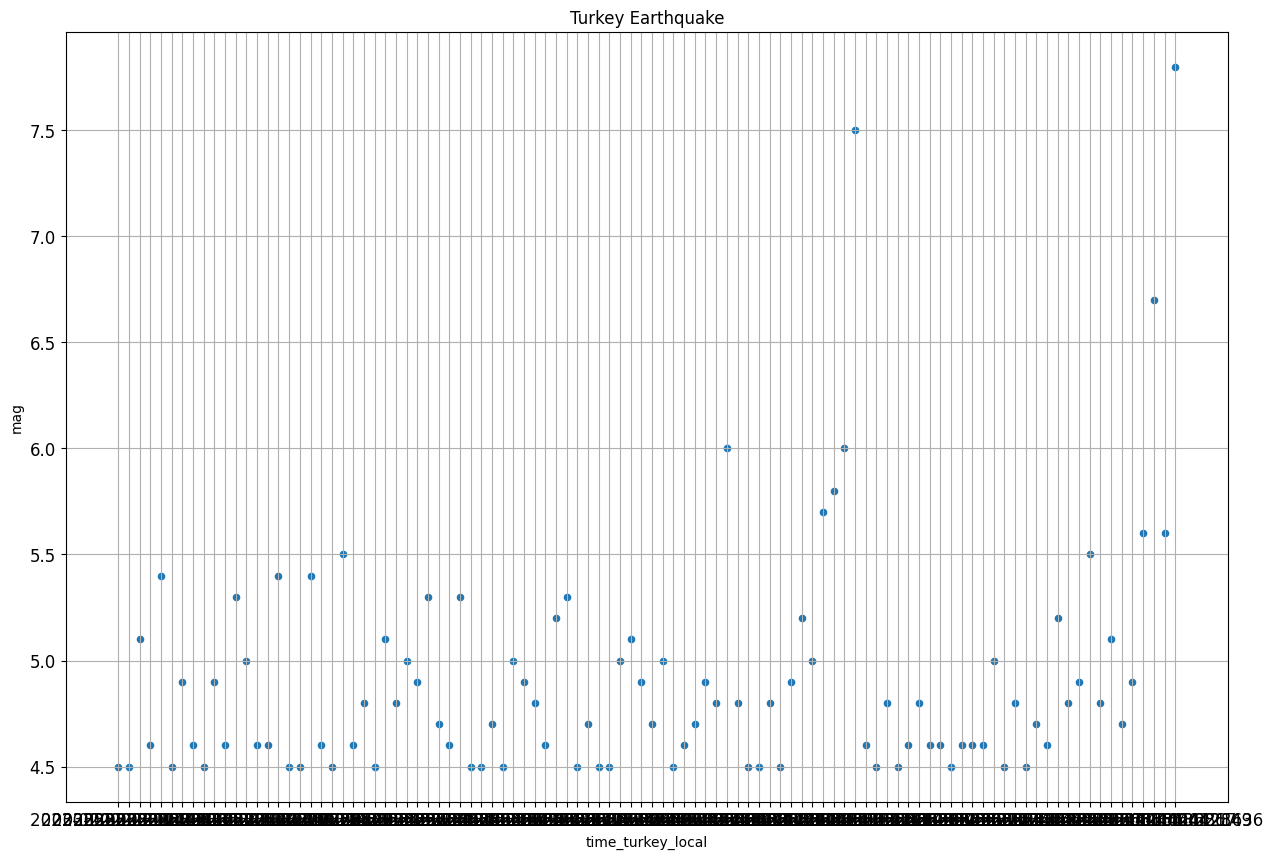

In [62]:
#plot a chart to show the time of the earthquake and the magnitude
quake_list_turkey_org.plot(x='time_turkey_local', y='mag', kind='scatter', title='Turkey Earthquake', figsize=(15, 10), grid=True, fontsize=12)
